In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path = "/Users/sebastianlee/Dropbox/Documents/Research/Projects/catastrophic/run/results/fig_2_data/"
path = "../../cata/run/results/test_ok/single/"

In [4]:
# ode_df = pd.read_csv(os.path.join(path, "ode_log.csv"))
# network_df = pd.read_csv(os.path.join(path, "network_log.csv"))
network_df = pd.read_csv(os.path.join(path, "data_logger_network.csv"))
network_df # Nan maybe because we are computing the error at certain time steps

,teacher_index,generalisation_error_0,generalisation_error_1,log_generalisation_error_0,log_generalisation_error_1,loss,student_head_0_weight_0,student_head_0_weight_1,teacher_head_0_weight_0,teacher_head_1_weight_0,student_self_overlap_0_0,student_self_overlap_0_1,student_self_overlap_1_0,student_self_overlap_1_1,student_teacher_0_overlap_0_0,student_teacher_0_overlap_1_0,student_teacher_1_overlap_0_0,student_teacher_1_overlap_1_0
0,NaN,0.168156,0.164849,-0.774287,-0.782915,NaN,1.000000,1.000000,1.0,-1.0,0.000001,4.049666e-09,4.049666e-09,0.000001,0.000007,-0.000018,0.000003,-0.000010
1,0.0,NaN,NaN,NaN,NaN,0.024843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,0.124782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,0.437349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,0.371703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,1.0,NaN,NaN,NaN,NaN,0.000524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,1.0,NaN,NaN,NaN,NaN,0.000139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,1.0,NaN,NaN,NaN,NaN,0.000352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999999,1.0,NaN,NaN,NaN,NaN,0.000683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
network_df = network_df.dropna() 
network_df

,teacher_index,generalisation_error_0,generalisation_error_1,log_generalisation_error_0,log_generalisation_error_1,loss,student_head_0_weight_0,student_head_0_weight_1,teacher_head_0_weight_0,teacher_head_1_weight_0,student_self_overlap_0_0,student_self_overlap_0_1,student_self_overlap_1_0,student_self_overlap_1_1,student_teacher_0_overlap_0_0,student_teacher_0_overlap_1_0,student_teacher_1_overlap_0_0,student_teacher_1_overlap_1_0
100,0.0,0.166807,0.170123,-0.777787,-0.769236,0.092156,0.999998,0.999996,1.0,-1.0,0.002357,0.002354,0.002354,0.002354,0.005161,0.005136,0.002620,0.002607
200,0.0,0.165106,0.174940,-0.782236,-0.757111,0.155953,0.999975,0.999973,1.0,-1.0,0.004272,0.004269,0.004269,0.004268,0.009234,0.009209,0.004941,0.004928
300,0.0,0.163411,0.180904,-0.786719,-0.742551,0.087382,0.999958,0.999955,1.0,-1.0,0.006511,0.006507,0.006507,0.006505,0.014287,0.014262,0.008060,0.008048
400,0.0,0.161313,0.187985,-0.792331,-0.725878,0.503945,0.999928,0.999924,1.0,-1.0,0.008875,0.008871,0.008871,0.008868,0.019433,0.019409,0.011427,0.011415
500,0.0,0.160839,0.191560,-0.793610,-0.717696,0.227839,0.999945,0.999941,1.0,-1.0,0.010648,0.010643,0.010643,0.010641,0.023291,0.023266,0.013315,0.013302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999600,1.0,0.507931,0.000660,-0.294196,-3.180217,0.000886,0.586267,0.586638,1.0,-1.0,0.591931,0.592211,0.592211,0.592493,-0.411863,-0.412230,-0.766447,-0.766811
999700,1.0,0.507955,0.000661,-0.294175,-3.180109,0.000939,0.586293,0.586663,1.0,-1.0,0.591982,0.592262,0.592262,0.592545,-0.411869,-0.412236,-0.766481,-0.766845
999800,1.0,0.507933,0.000660,-0.294193,-3.180278,0.000563,0.586244,0.586615,1.0,-1.0,0.592014,0.592294,0.592294,0.592576,-0.411882,-0.412249,-0.766501,-0.766865
999900,1.0,0.507893,0.000661,-0.294228,-3.180120,0.000029,0.586194,0.586564,1.0,-1.0,0.592026,0.592306,0.592306,0.592588,-0.411887,-0.412254,-0.766509,-0.766873


C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_31316\215511655.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


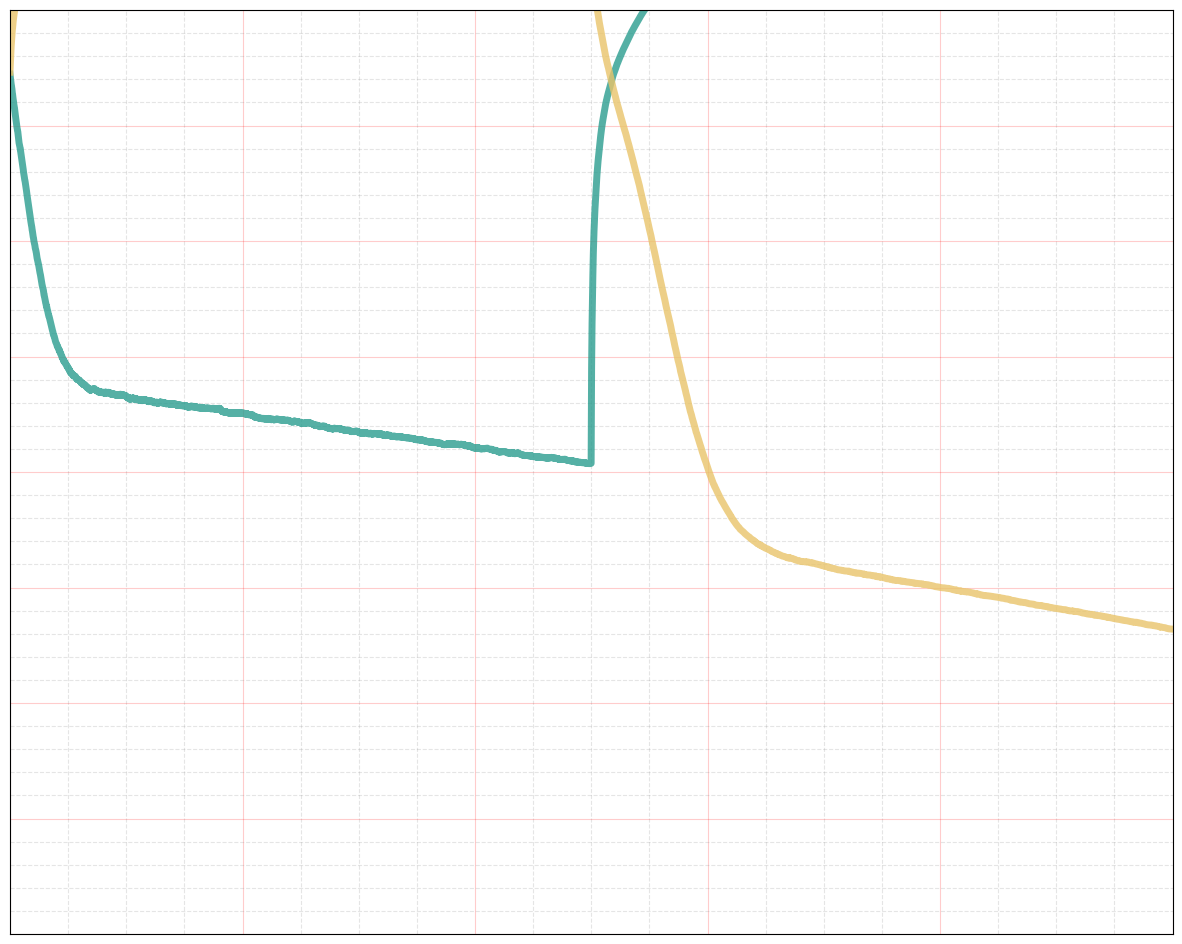

In [6]:
f = 200

fig = plt.figure(figsize=(15,12))
network_error_0 = np.array(network_df["log_generalisation_error_0"])
network_error_1 = np.array(network_df["log_generalisation_error_1"])
# ode_error_0 = np.array(ode_df["log_generalisation_error_0"])
# ode_error_1 = np.array(ode_df["log_generalisation_error_1"])
plt.plot(range(len(network_error_0)), network_error_0, alpha=0.8, linewidth=5, color="#2A9D8F")
plt.plot(range(len(network_error_1)), network_error_1, alpha=0.8, linewidth=5, color="#E9C46A")
# plt.scatter(range(len(ode_error_0))[::f], ode_error_0[::f], marker="+", color="#2A9D8F", s=400)
# plt.scatter(range(len(ode_error_1))[::f], ode_error_1[::f], marker="+", color="#E9C46A", s=400)
plt.xlim(0, 10000)
plt.ylim(-4.5, -0.5)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("ode_verification_error_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [7]:
network_df.keys()

Index(['teacher_index', 'generalisation_error_0', 'generalisation_error_1',
       'log_generalisation_error_0', 'log_generalisation_error_1', 'loss',
       'student_head_0_weight_0', 'student_head_0_weight_1',
       'teacher_head_0_weight_0', 'teacher_head_1_weight_0',
       'student_self_overlap_0_0', 'student_self_overlap_0_1',
       'student_self_overlap_1_0', 'student_self_overlap_1_1',
       'student_teacher_0_overlap_0_0', 'student_teacher_0_overlap_1_0',
       'student_teacher_1_overlap_0_0', 'student_teacher_1_overlap_1_0'],
      dtype='object')

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_31316\3837064098.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


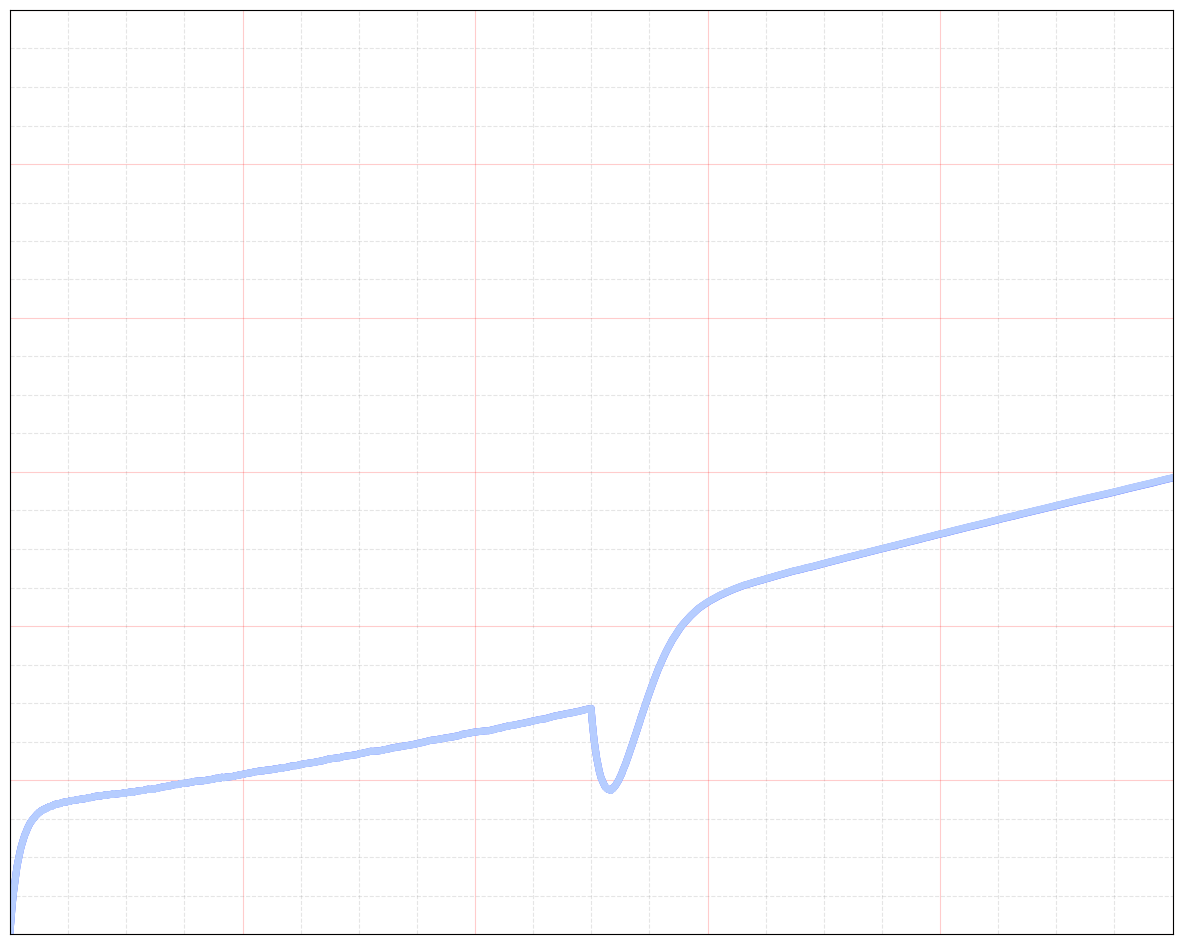

In [8]:
f = 200

fig = plt.figure(figsize=(15,12))
network_error_q_00 = np.array(network_df["student_self_overlap_0_0"])
network_error_q_01 = np.array(network_df["student_self_overlap_0_1"])
network_error_q_10 = np.array(network_df["student_self_overlap_1_0"])
network_error_q_11 = np.array(network_df["student_self_overlap_1_1"])

# ode_error_q_00 = np.array(ode_df["student_self_overlap_0_0"])
# ode_error_q_01 = np.array(ode_df["student_self_overlap_0_1"])
# ode_error_q_10 = np.array(ode_df["student_self_overlap_1_0"])
# ode_error_q_11 = np.array(ode_df["student_self_overlap_1_1"])

plt.plot(range(len(network_error_q_00)), network_error_q_00, alpha=0.8, linewidth=5, color="#5465ff")
plt.plot(range(len(network_error_q_01)), network_error_q_01, alpha=0.8, linewidth=5, color="#788bff")
plt.plot(range(len(network_error_q_10)), network_error_q_10, alpha=0.8, linewidth=5, color="#9bb1ff")
plt.plot(range(len(network_error_q_11)), network_error_q_11, alpha=0.8, linewidth=5, color="#bfd7ff")

# plt.scatter(range(len(ode_error_q_00))[::f], ode_error_q_00[::f], color="#5465ff", marker="+", s=400)
# plt.scatter(range(len(ode_error_q_01))[::f], ode_error_q_01[::f], color="#788bff", marker="+", s=400)
# plt.scatter(range(len(ode_error_q_10))[::f], ode_error_q_10[::f], color="#9bb1ff", marker="+", s=400)
# plt.scatter(range(len(ode_error_q_11))[::f], ode_error_q_11[::f], color="#bfd7ff", marker="+", s=400)

plt.xlim(0, 10000)
plt.ylim(0, 1.2)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)

plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("ode_verification_q_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_31316\4290208446.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


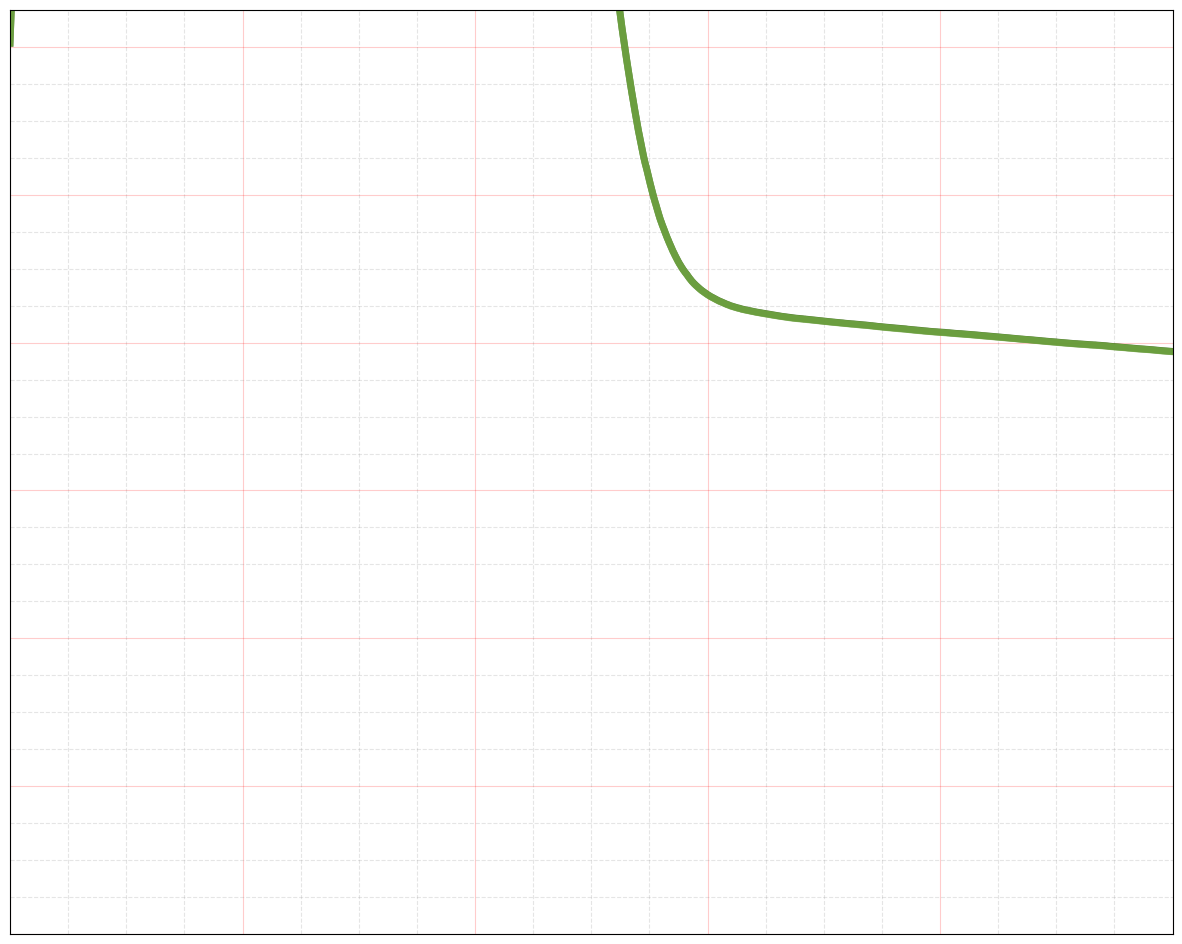

In [9]:
f = 200

fig = plt.figure(figsize=(15,12))
network_error_r_00 = np.array(network_df["student_teacher_0_overlap_0_0"])
network_error_r_10 = np.array(network_df["student_teacher_0_overlap_1_0"])

# ode_error_r_00 = np.array(ode_df["student_teacher_0_overlap_0_0"])
# ode_error_r_10 = np.array(ode_df["student_teacher_0_overlap_1_0"])

plt.plot(range(len(network_error_r_00)), network_error_r_00, alpha=0.8, linewidth=5, color="#245501")
plt.plot(range(len(network_error_r_10)), network_error_r_10, alpha=0.8, linewidth=5, color="#73a942")

# plt.scatter(range(len(ode_error_r_00))[::f], ode_error_r_00[::f], color="#245501", marker="+", s=400)
# plt.scatter(range(len(ode_error_r_10))[::f], ode_error_r_10[::f], color="#73a942", marker="+", s=400)

plt.xlim(0, 10000)
plt.ylim(-1.2, 0.05)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)


plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("ode_verification_r_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

C:\Users\Lisa_ach\AppData\Local\Temp\ipykernel_31316\2162595950.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


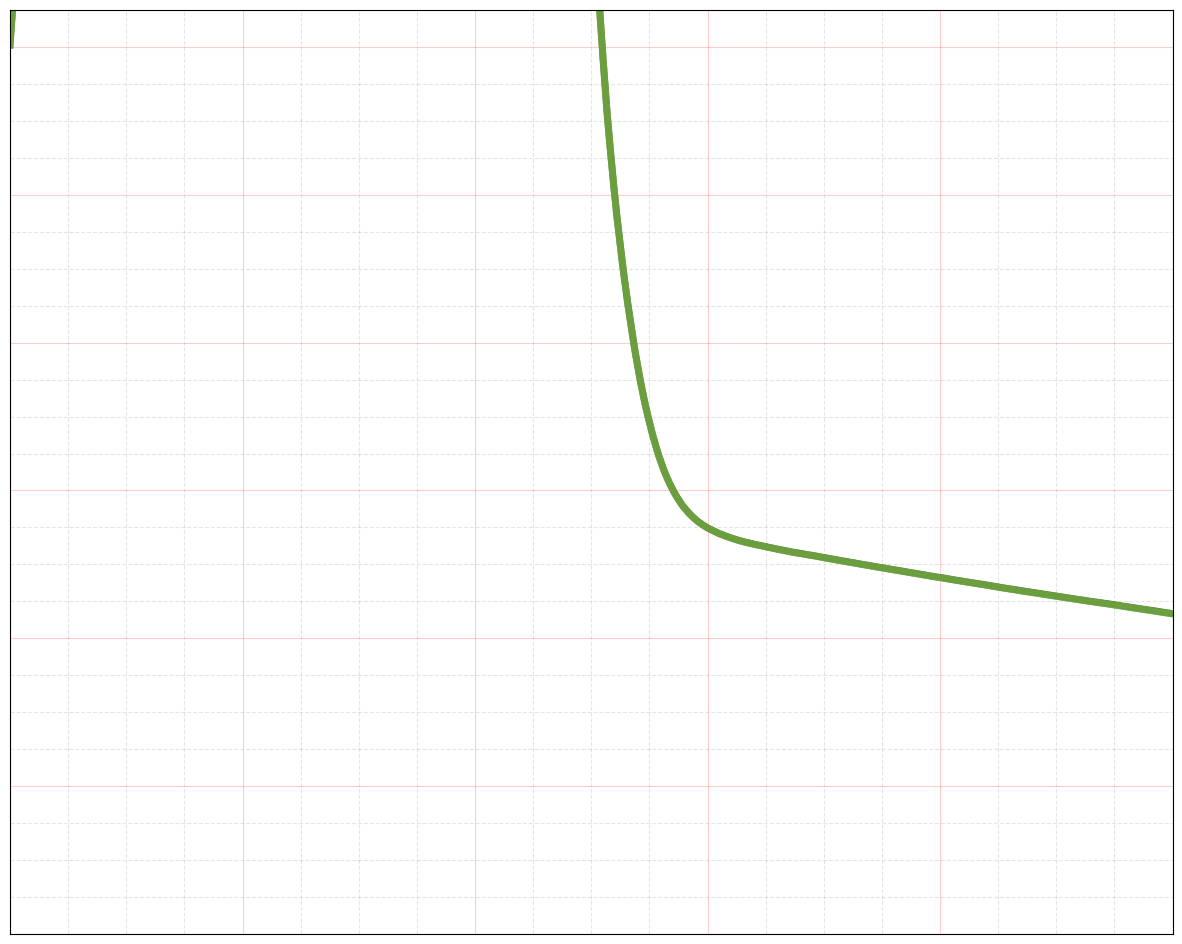

In [10]:
f = 200

fig = plt.figure(figsize=(15,12))
network_error_u_00 = np.array(network_df["student_teacher_1_overlap_0_0"])
network_error_u_10 = np.array(network_df["student_teacher_1_overlap_1_0"])

# ode_error_u_00 = np.array(ode_df["student_teacher_1_overlap_0_0"])
# ode_error_u_10 = np.array(ode_df["student_teacher_1_overlap_1_0"])

plt.plot(range(len(network_error_u_00)), network_error_u_00, alpha=0.8, linewidth=5, color="#245501")
plt.plot(range(len(network_error_u_10)), network_error_u_10, alpha=0.8, linewidth=5, color="#73a942")

# plt.scatter(range(len(ode_error_u_00))[::f], ode_error_u_00[::f], color="#245501", marker="+", s=400)
# plt.scatter(range(len(ode_error_u_10))[::f], ode_error_u_10[::f], color="#73a942", marker="+", s=400)

plt.xlim(0, 10000)
plt.ylim(-1.2, 0.05)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("ode_verification_u_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [11]:
f = 200

fig = plt.figure(figsize=(15,12))
network_error_head_0_0 = np.array(network_df["student_head_0_weight_0"])
network_error_head_0_1 = np.array(network_df["student_head_0_weight_1"])
network_error_head_1_0 = np.array(network_df["student_head_1_weight_0"])
network_error_head_1_1 = np.array(network_df["student_head_1_weight_1"])

# ode_error_head_0_0 = np.array(ode_df["student_head_0_weight_0"])
# ode_error_head_0_1 = np.array(ode_df["student_head_0_weight_1"])
# ode_error_head_1_0 = np.array(ode_df["student_head_1_weight_0"])
# ode_error_head_1_1 = np.array(ode_df["student_head_1_weight_1"])

plt.plot(range(len(network_error_head_0_0)), network_error_head_0_0, alpha=0.8, linewidth=5, color="#E9C46A")
plt.plot(range(len(network_error_head_0_1)), network_error_head_0_1, alpha=0.8, linewidth=5, color="#F4A261")
plt.plot(range(len(network_error_head_1_0)), network_error_head_1_0, alpha=0.8, linewidth=5, color="#2A9D8F")
plt.plot(range(len(network_error_head_1_1)), network_error_head_1_1, alpha=0.8, linewidth=5, color="#4E8098")

# plt.scatter(range(len(ode_error_head_0_0))[::f], ode_error_head_0_0[::f], color="#E9C46A", marker="+", s=400)
# plt.scatter(range(len(ode_error_head_0_1))[::f], ode_error_head_0_1[::f], color="#F4A261", marker="+", s=400)
# plt.scatter(range(len(ode_error_head_1_0))[::f], ode_error_head_1_0[::f], color="#2A9D8F", marker="+", s=400)
# plt.scatter(range(len(ode_error_head_1_1))[::f], ode_error_head_1_1[::f], color="#4E8098", marker="+", s=400)

plt.xlim(0, 10000)
plt.ylim(-1, 1)
plt.minorticks_on()
# plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
# plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.grid(True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(True, which='minor', color='gray', linestyle='--', alpha=0.2)
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
fig.show()
fig.savefig("ode_verification_heads_crosses.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

KeyError: 'student_head_1_weight_0'

<Figure size 1500x1200 with 0 Axes>

In [15]:
print(network_df.columns)


Index(['teacher_index', 'generalisation_error_0', 'generalisation_error_1',
       'log_generalisation_error_0', 'log_generalisation_error_1', 'loss',
       'student_head_0_weight_0', 'student_head_0_weight_1',
       'teacher_head_0_weight_0', 'teacher_head_1_weight_0',
       'student_self_overlap_0_0', 'student_self_overlap_0_1',
       'student_self_overlap_1_0', 'student_self_overlap_1_1',
       'student_teacher_0_overlap_0_0', 'student_teacher_0_overlap_1_0',
       'student_teacher_1_overlap_0_0', 'student_teacher_1_overlap_1_0'],
      dtype='object')


In [12]:
network_df["student_head_1_weight_0"]

KeyError: 'student_head_1_weight_0'